In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# 1. Data Cleaning and Preparation

In [20]:
data = pd.read_csv('/content/googleplaystore.csv')

print(data.isnull().sum())

data.drop_duplicates(inplace=True)

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = data['Size'].str.replace('k', '')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

print(data.head())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0  Free    0.0       Everyone   
1     967.0  14.0    500000.0  Free    0.0       Everyone   
2   87510.0   8.7   5000

# 2. Exploratory Data Analysis (EDA)

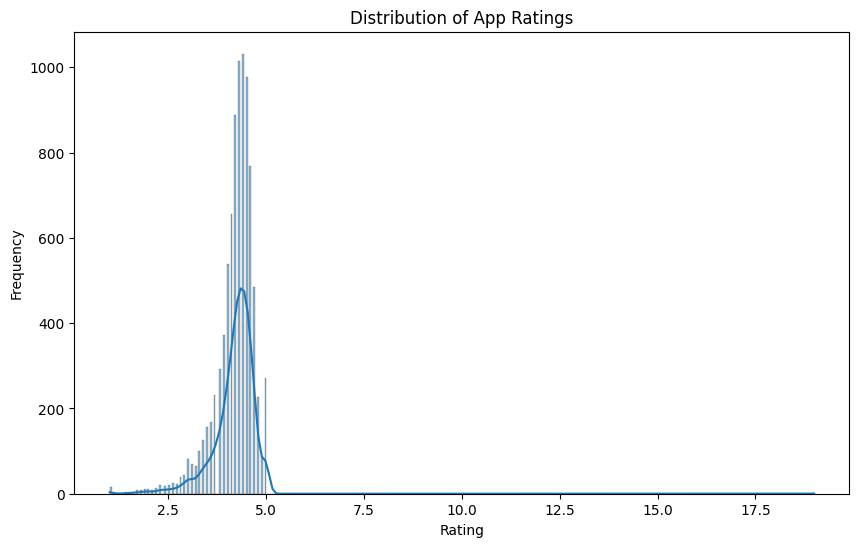

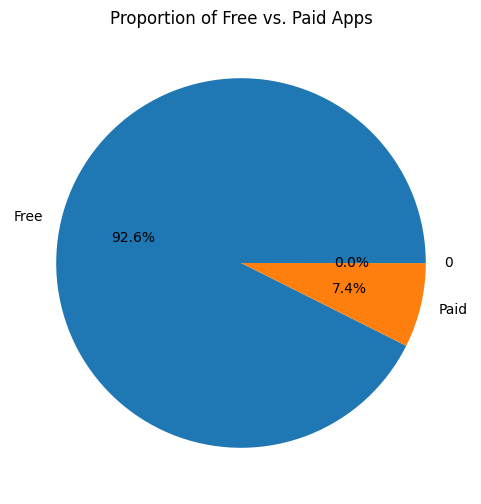

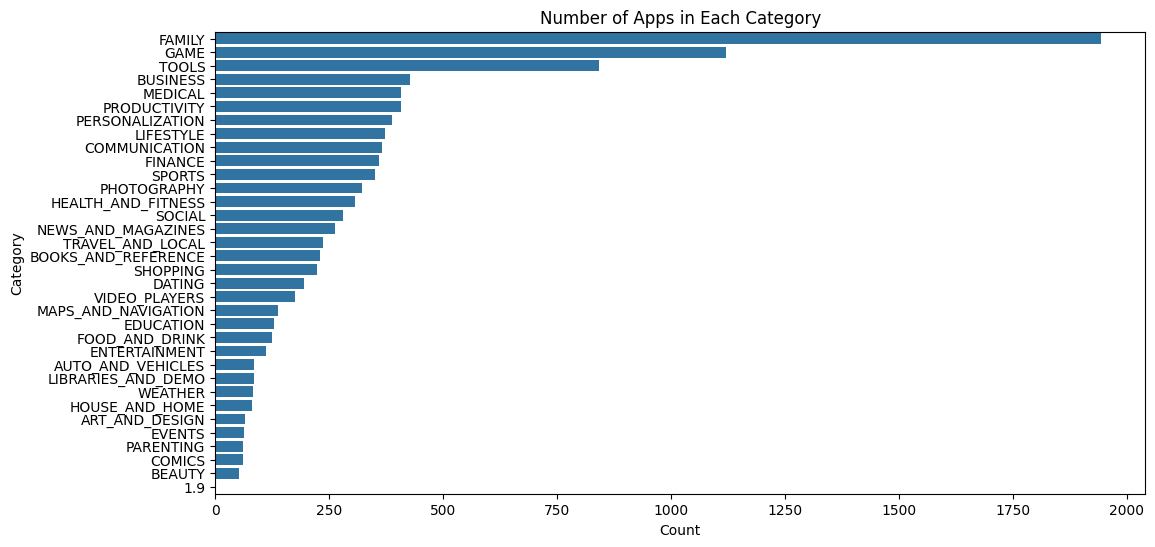

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Proportion of free vs. paid apps
plt.figure(figsize=(6,6))
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Free vs. Paid Apps')
plt.ylabel('')
plt.show()

# Number of apps in each category
plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=data, order = data['Category'].value_counts().index)
plt.title('Number of Apps in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# 3. Category Analysis

In [22]:
average_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(average_rating_by_category.head(1))

# Most reviews by category
most_reviews_by_category = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
print(most_reviews_by_category.head(1))

# Most apps by category
most_apps_by_category = data['Category'].value_counts()
print(most_apps_by_category.head(1))

Category
1.9    19.0
Name: Rating, dtype: float64
Category
GAME    1.415537e+09
Name: Reviews, dtype: float64
Category
FAMILY    1943
Name: count, dtype: int64


# 4. Rating Prediction Model

In [23]:
data_cleaned = data.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'])

# Select relevant features
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']

# Encode categorical variables (Type and Content Rating)
encoded_data = pd.get_dummies(data_cleaned[features])

# Target variable
target = data_cleaned['Rating']

X_train, X_test, y_train, y_test = train_test_split(encoded_data, target, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

# 5. Trend Analysis

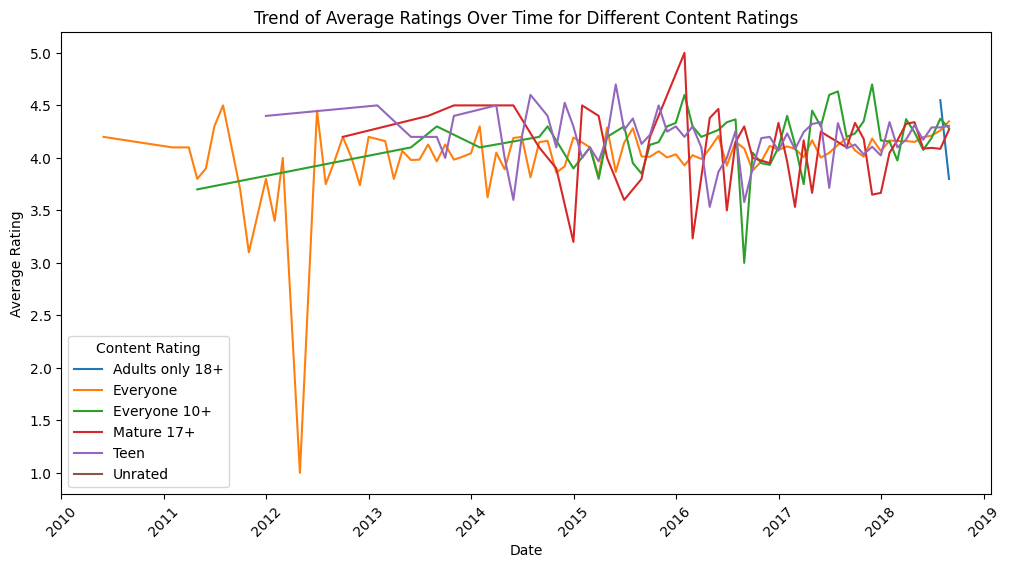

In [24]:
# Convert 'Last Updated' column to datetime with errors='coerce'
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

# Drop rows with NaT values in 'Last Updated' column
data.dropna(subset=['Last Updated'], inplace=True)

# Group data by 'Content Rating' and 'Last Updated' to calculate average rating over time
rating_trend_data = data.groupby(['Content Rating', pd.Grouper(key='Last Updated', freq='M')])['Rating'].mean().reset_index()

# Plotting the trend of average ratings over time for different content ratings
plt.figure(figsize=(12, 6))
sns.lineplot(x='Last Updated', y='Rating', hue='Content Rating', data=rating_trend_data)
plt.title('Trend of Average Ratings Over Time for Different Content Ratings')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Content Rating')
plt.show()


# 6. Impact of Reviews on Ratings

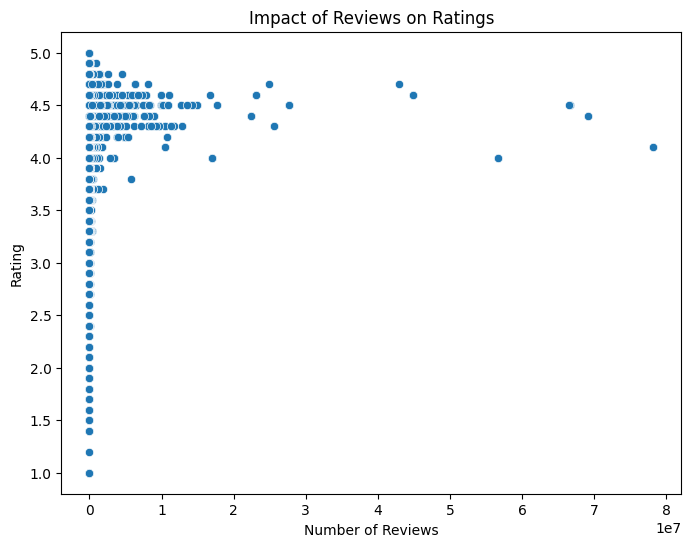

Correlation between Reviews and Rating: 0.06873219864459121


In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data)
plt.title('Impact of Reviews on Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

correlation = data['Reviews'].corr(data['Rating'])
print("Correlation between Reviews and Rating:", correlation)